In [1]:
import numpy as np 
import pandas as pd 
import os
dataset_folder = 'Output'
train_val_folder = 'labels'
images_folder = 'images'
ip_folder = ''
walk_path = os.path.join(ip_folder, dataset_folder)
image_path = os.path.join(ip_folder, dataset_folder, train_val_folder, images_folder)
for dirname, _, filenames in os.walk(walk_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Output\d_r_103_.jpg.mp3
Output\d_r_105_.jpg.mp3
Output\d_r_112_.jpg.mp3
Output\d_r_113_.jpg.mp3
Output\d_r_125_.jpg.mp3
Output\d_r_132_.jpg.mp3
Output\d_r_135_.jpg.mp3
Output\d_r_145_.jpg.mp3
Output\d_r_148_.jpg.mp3
Output\d_r_14_.jpg.mp3
Output\d_r_153_.jpg.mp3
Output\d_r_160_.jpg.mp3
Output\d_r_162_.jpg.mp3
Output\d_r_163_.jpg.mp3
Output\d_r_165_.jpg.mp3
Output\d_r_169_.jpg.mp3
Output\d_r_171_.jpg.mp3
Output\d_r_174_.jpg.mp3
Output\d_r_179_.jpg.mp3
Output\d_r_17_.jpg.mp3
Output\d_r_185_.jpg.mp3
Output\d_r_186_.jpg.mp3
Output\d_r_189_.jpg.mp3
Output\d_r_18_.jpg.mp3
Output\d_r_195_.jpg.mp3
Output\d_r_198_.jpg.mp3
Output\d_r_1_.jpg.mp3
Output\d_r_204_.jpg.mp3
Output\d_r_20_.jpg.mp3
Output\d_r_211_.jpg.mp3
Output\d_r_215_.jpg.mp3
Output\d_r_217_.jpg.mp3
Output\d_r_223_.jpg.mp3
Output\d_r_22_.jpg.mp3
Output\d_r_23_.jpg.mp3
Output\d_r_25_.jpg.mp3
Output\d_r_26_.jpg.mp3
Output\d_r_29_.jpg.mp3
Output\d_r_31_.jpg.mp3
Output\d_r_33_.jpg.mp3
Output\d_r_37_.jpg.mp3
Output\d_r_3_.jpg.mp3
Output\d

In [2]:
import os
import pickle
import numpy as np
from tqdm.notebook import tqdm

from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add

In [3]:
op_folder_name = 'Output_Caption_Text'
BASE_DIR = os.path.join(ip_folder, dataset_folder, train_val_folder)
WORKING_DIR = os.path.join(ip_folder, op_folder_name)

In [4]:
model = VGG19()
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [5]:
features = {}
directory = os.path.join(BASE_DIR, 'images')

for img_name in tqdm(os.listdir(directory)):
   
    img_path = directory + '/' + img_name
    image = load_img(img_path, target_size=(224, 224))
   
    image = img_to_array(image)
   
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    
    image = preprocess_input(image)
   
    feature = model.predict(image, verbose=0)
  
    image_id = img_name.split('.')[0]
    
    features[image_id] = feature

  0%|          | 0/110 [00:00<?, ?it/s]

In [6]:
pickle.dump(features, open(os.path.join(WORKING_DIR, 'features.pkl'), 'wb'))

In [7]:
with open(os.path.join(WORKING_DIR, 'features.pkl'), 'rb') as f:
    features = pickle.load(f)

In [8]:
with open(os.path.join(BASE_DIR, 'captions.txt'), 'r') as f:
    next(f)
    captions_doc = f.read()

In [9]:
mapping = {}
for line in tqdm(captions_doc.split('\n')):
    tokens = line.split(',')
    if len(line) < 2:
        continue
    image_id, caption = tokens[0], tokens[1:]
    image_id = image_id.split('.')[0]
    caption = " ".join(caption)
    if image_id not in mapping:
        mapping[image_id] = []
    mapping[image_id].append(caption)

  0%|          | 0/110 [00:00<?, ?it/s]

In [10]:
len(mapping)

110

In [11]:
def clean(mapping):
    for key, captions in mapping.items():
        for i in range(len(captions)):
            caption = captions[i]
            caption = caption.lower()
            caption = caption.replace('[^A-Za-z]', '')
            caption = caption.replace('\s+', ' ')
            caption = 'startseq ' + " ".join([word for word in caption.split() if len(word)>1]) + ' endseq'
            captions[i] = caption

In [39]:
image_id = 'd_r_129_'
if image_id in mapping:
    captions = mapping[image_id]
    print(captions)
else:
    print(f"Key '{image_id}' not found in the mapping dictionary.")


['startseq fish swimming in the water endseq']


In [13]:
# preprocess the text
clean(mapping)

In [14]:
# after preprocess of text
mapping['d_r_122_']

['startseq person in green shirt and goggles holding tube endseq']

In [15]:
all_captions = []
for key in mapping:
    for caption in mapping[key]:
        all_captions.append(caption)

In [16]:
len(all_captions)

110

In [17]:
all_captions[:10]

['startseq person in scuba gear underwater endseq',
 'startseq scuba diver underwater in the ocean endseq',
 'startseq scuba diver in the water endseq',
 'startseq person in green shirt and goggles holding tube endseq',
 'startseq fish swimming in the water endseq',
 'startseq fish swimming in the water endseq',
 'startseq person diving with stingray endseq',
 'startseq scuba diver swimming with two fish endseq',
 'startseq group of people in the water endseq',
 'startseq scuba diver swimming underwater endseq']

In [18]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index) + 1

In [19]:
vocab_size

86

In [20]:
max_length = max(len(caption.split()) for caption in all_captions)
max_length

10

In [21]:
image_ids = list(mapping.keys())
split = int(len(image_ids) * 0.90)
train = image_ids[:split]
test = image_ids[split:]

In [22]:
def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    X1, X2, y = list(), list(), list()
    n = 0
    while 1:
        for key in data_keys:
            n += 1
            captions = mapping[key]
            for caption in captions:
                seq = tokenizer.texts_to_sequences([caption])[0]
                for i in range(1, len(seq)):
                    in_seq, out_seq = seq[:i], seq[i]
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                    X1.append(features[key][0])
                    X2.append(in_seq)
                    y.append(out_seq)
            if n == batch_size:
                X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                yield [X1, X2], y
                X1, X2, y = list(), list(), list()
                n = 0

In [23]:
!pip install pydot

Defaulting to user installation because normal site-packages is not writeable


In [64]:
inputs1 = Input(shape=(4096,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)

inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = LSTM(256)(se2)

decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')
plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [74]:
epochs = 20
batch_size = 32
steps = len(train) // batch_size

for i in range(epochs):
    generator = data_generator(train, mapping, features, tokenizer, max_length, vocab_size, batch_size)
    model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)

3/3 [==============================] - 0s 119ms/step - loss: 0.7115


In [75]:
# save the model
model.save(WORKING_DIR+'/best_model.h5')

In [76]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [77]:
def predict_caption(model, image, tokenizer, max_length):
    in_text = 'startseq'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], max_length)
        yhat = model.predict([image, sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = idx_to_word(yhat, tokenizer)
        if word is None:
            break
        in_text += " " + word
        if word == 'endseq':
            break
      
    return in_text

In [78]:
import random
import cv2

In [79]:
    train_images_path = os.path.join(ip_folder, dataset_folder, train_val_folder, images_folder)
    train_imgs_list = sorted(os.listdir(train_images_path))
    total_images_train=len(train_imgs_list)
total_images_train

110

In [80]:
all_pred_captions = []

In [81]:
from PIL import Image
import matplotlib.pyplot as plt
from nltk.translate.bleu_score import corpus_bleu
actual, predicted = list(), list()
def generate_caption(image_name):
    image_id = image_name.split('.')[0]
    img_path = os.path.join(BASE_DIR, "Images", image_name)
    image = Image.open(img_path)
    captions = mapping[image_id]
    y_pred = predict_caption(model, features[image_id], tokenizer, max_length)
    print(y_pred)
    plt.imshow(image)
    for _ in range(1):
        key=train_imgs_list[random_number].split('.')[0]
        captions = mapping[key]
        y_pred = predict_caption(model, features[key], tokenizer, max_length) 
        actual_captions = [caption.split() for caption in captions]
        y_pred = y_pred.split()
        actual.append(actual_captions)
        predicted.append(y_pred)
        print("BLEU: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
        all_pred_captions.append(corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))

d_r_129_.jpg
startseq fish swimming in the water endseq
BLEU: 1.000000
d_r_144_.jpg
startseq fish swimming in the water endseq
BLEU: 1.000000
d_r_166_.jpg
startseq person person diving with endseq
BLEU: 1.000000
d_r_182_.jpg
startseq fish swimming under the water endseq
BLEU: 1.000000
d_r_196_.jpg
startseq group of people in the water endseq
BLEU: 1.000000
d_r_233_.jpg
startseq diver swimming underwater underwater endseq
BLEU: 1.000000
d_r_277_.jpg
startseq submarine in the water endseq
BLEU: 1.000000
d_r_300_.jpg
startseq rectangular rectangular floating in the water endseq
BLEU: 1.000000
d_r_345_.jpg
startseq diver swimming under water endseq
BLEU: 1.000000
d_r_379_.jpg
startseq person person in wet suit goggles endseq
BLEU: 1.000000
d_r_384_.jpg
startseq view view boat boat endseq


KeyboardInterrupt: 

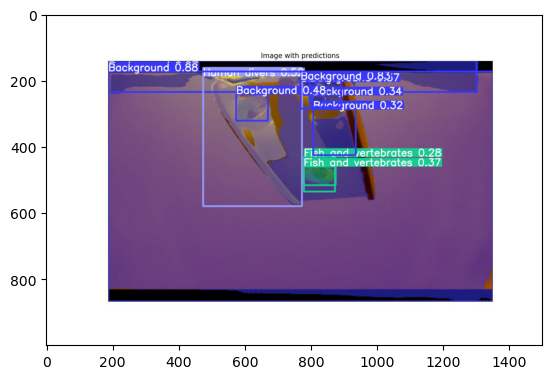

In [83]:
for img_path in train_imgs_list[1:total_images_train-1]:
    print(img_path)
    generate_caption(img_path)
    

In [ ]:
for _ in range(1):
        random_number = random.randint(1, total_images_train - 1)
        print(train_imgs_list[random_number])
        generate_caption(train_imgs_list[random_number])

In [84]:
print(all_pred_captions)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [85]:
pip install nltk


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


startseq fish swimming in the water endseq
BLEU: 1.000000


NameError: name 'img_index' is not defined

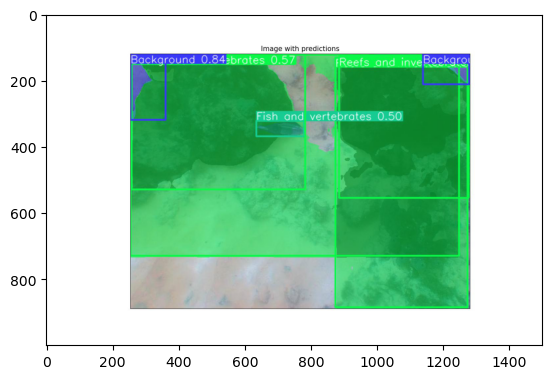

In [96]:
import random
import nltk
from nltk.translate.bleu_score import corpus_bleu
reference=[all_captions]
bleu_scores = []
for img_path in train_imgs_list[1:total_images_train]:
    generated_caption = generate_caption(img_path)
    reference_captions = reference[img_index] 
    gen_caption_tokens = nltk.word_tokenize(generated_caption.lower())
    ref_captions_tokens = [nltk.word_tokenize(ref.lower()) for ref in reference_captions]
    bleu_score = corpus_bleu([ref_captions_tokens], gen_caption_tokens)
    bleu_scores.append(bleu_score)
average_bleu_score = sum(bleu_scores) / len(bleu_scores)
print("Average BLEU Score: {}".format(average_bleu_score))


In [95]:
import random
import nltk
from nltk.translate.bleu_score import corpus_bleu
bleu_scores = []
for img_path in train_imgs_list[1:total_images_train]:
    generated_caption = generate_caption(img_path)
    reference_captions = all_captions[img_index] 
    gen_caption_tokens = nltk.word_tokenize(generated_caption.lower())
    ref_captions_tokens = [nltk.word_tokenize(ref.lower()) for ref in reference_captions]
    bleu_score = corpus_bleu([ref_captions_tokens], gen_caption_tokens)
    bleu_scores.append(bleu_score)
average_bleu_score = sum(bleu_scores) / len(bleu_scores)
print("Average BLEU Score: {}".format(average_bleu_score))

Average BLEU Score: 0.9842681428571428


d_r_345_.jpg
startseq diver swimming under water endseq
BLEU: 0.998218


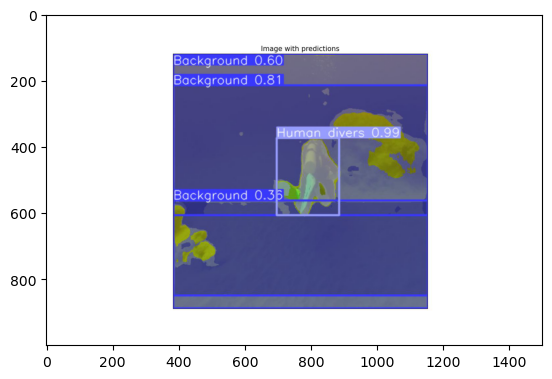

In [97]:
for _ in range(1):
        random_number = random.randint(1, total_images_train - 1)
        print(train_imgs_list[random_number])
        generate_caption(train_imgs_list[random_number])

f_r_1165_.jpg
startseq of swimming in in water endseq
BLEU: 0.567505


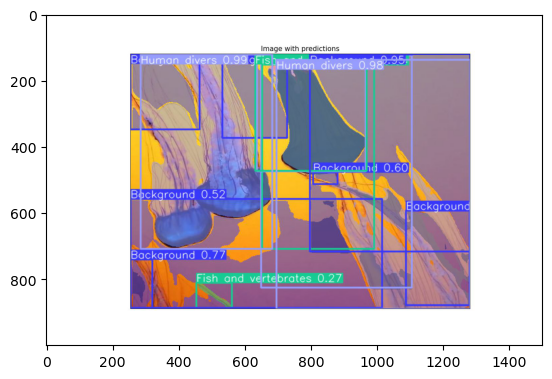

In [47]:
for _ in range(1):
        random_number = random.randint(1, total_images_train - 1)
        print(train_imgs_list[random_number])
        generate_caption('f_r_1467_.jpg')

f_r_1435_.jpg
startseq swimming swimming in the endseq
BLEU: 0.626257


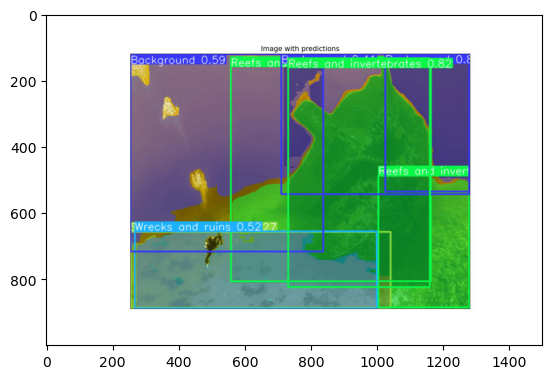

In [48]:
for _ in range(1):
        random_number = random.randint(1, total_images_train - 1)
        print(train_imgs_list[random_number])
        generate_caption('w_r_199_.jpg')

n_l_84_.jpg
startseq person person in the water endseq
BLEU: 0.558730


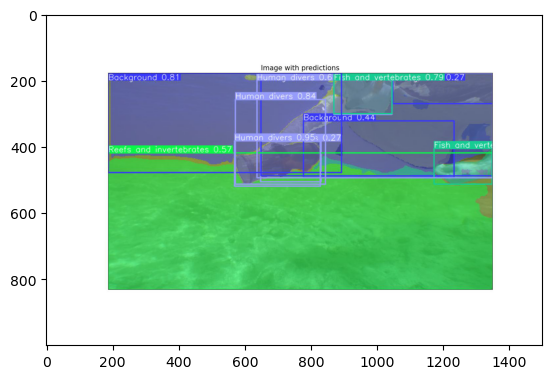

In [49]:
for _ in range(1):
        random_number = random.randint(1, total_images_train - 1)
        #print(random_number)
        print(train_imgs_list[random_number])
        generate_caption('d_r_122_.jpg')

In [ ]:
!pip install gtts

In [ ]:
!pip install pyttsx3

In [ ]:
from gtts import gTTS
import os
text = "Hello, how are you?"
tts = gTTS(text)
output_file = "output/speech.mp3"
tts.save(output_file)
os.system(f"mpg123 {output_file}")

In [ ]:
import os
import csv
import random
from PIL import Image
from gtts import gTTS
from IPython.display import Audio, display
def generate_captions_speech_from_csv(image_folder, csv_file, num_images=5):
    with open(csv_file, 'r') as f:
        reader = csv.reader(f)
        next(reader)  
        random_rows = random.sample(list(reader), num_images)
        for row in random_rows:
            image_file = row[0]
            caption = row[1]
            tts = gTTS(caption)
            speech_path = f"output/{image_file}.mp3"
            tts.save(speech_path)
            image_path = os.path.join(image_folder, image_file)
            image = Image.open(image_path)
            display(image)
            display(Audio(speech_path))
            print("Image File:", image_file)
            print("Caption:", caption)
            print()

In [ ]:
dataset_folder = 'Input'
train_val_folder = 'train_val'
images_folder = 'images'
ip_folder = ''
walk_path = os.path.join(ip_folder, dataset_folder)
image_folder = os.path.join(ip_folder, dataset_folder, train_val_folder, images_folder)
file_name = 'captions.txt' 
csv_file = os.path.join(ip_folder, dataset_folder, train_val_folder, file_name)

generate_captions_speech_from_csv(image_folder, csv_file, num_images=5)